# Loan Prediction with Keras
By Adam Lang
Date: February 15, 2024
* In this notebook I will demonstrate training a neural network using Keras and Tensorflow.
* This will be done on `structured data`.

Problem Statement: Loan Prediction
* Based on the details given about each customer in the tabular data, predict whether or not to approve a loan for each customer.
* Target/dependent variable: 'Loan_Status`
- binary classificaiton problem: Y approved or N not approved.


## Data pre-processing steps
1. Filling missing values.
2. Converting categories to numbers.
3. Bring all variables in range 0 to 1.

In [1]:
# import required libraries to pre-process
import pandas as pd

In [2]:
# check version of pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 1.5.3


In [3]:
# reading in the data
data = pd.read_csv('/content/drive/MyDrive/Analytics_Vidhya_LLM_GenAI/loan_data.csv')

In [4]:
# look at head of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# shape of data
data.shape

(614, 13)

In [6]:
# check missing data values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# data types of variables - so we know what to fill in!
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#1. Filling the missing values

### Categorical Data: Mode

In [8]:
# filling missing values of categorical variables with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Mean

In [9]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [10]:
# checking missing values after imputing
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

summary: no missing values in any of the columns

### 2. Converting categories to numbers

In [11]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male':0, 'Female': 1})
data['Married'] = data['Married'].map({'No':0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [12]:
#check data transformation.
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


summary: All categorical columns are one-hot encoded now!

# 3. Bringing all the variables in range 0 to 1

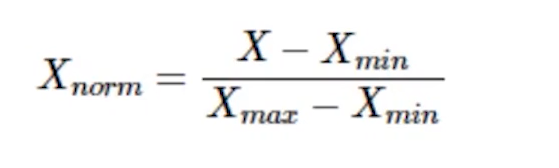

In [13]:
# bring variables in to range 0 to 1 using equation above
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [14]:
# applying for loop to bring all variables in range 0 to 1

for i in data.columns[1:]:
  data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [15]:
# check again looking at first 5 rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [16]:
# saving pre-processed data
#data.to_csv('loan_prediction_pre-processed.csv', index=False)

# Steps to build a neural network using Keras
1. Loading the dataset
2. Creating training and validation set
3. Defining the architecture of the model
4. Compiling the model (defining loss/cost function, optimizer)

Loss/Cost Function: mean_squared_error, binary_crossentropy

In [17]:
# import required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#check version of sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.2.2


In [19]:
# if we were to load the data again in this stage ->
# data = pd.read_csv('loan_prediction_data.csv')

In [20]:
#data is already in this notebook
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [21]:
# check missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# check data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

summary: all data types are float except for LOAN_ID

In [23]:
# remove loan_ID since these are just unique values
data = data.drop('Loan_ID', axis=1)

In [24]:
# check shape of data
data.shape

(614, 12)

In [25]:
# separate independent and dependent variables

# storing all independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [26]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

# 2. Creating training and validation set

In [27]:
# creating training and validation set
# stratify distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set =>random state ensures split occurs in appropriate manner
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=data['Loan_Status'], random_state=10, test_size=0.2)

In [28]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# 3. Defining architecture of the model

In [29]:
# checking version of keras
import keras
print(keras.__version__)

2.15.0


In [30]:
# checking version of tensorflow - keras uses tf at backend
import tensorflow as tf
print(tf.__version__)

2.15.0


### a. Create a model
* Define neural network layers
* Define number of neurons in each layer
* Below is the `Forward Propogation` equation

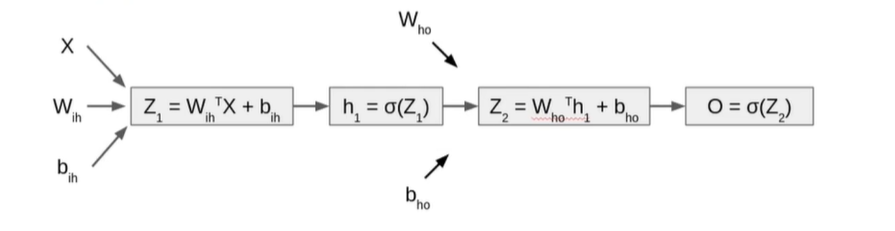

### Create Sequential model

In [31]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers
* Input
* Hidden
* Output

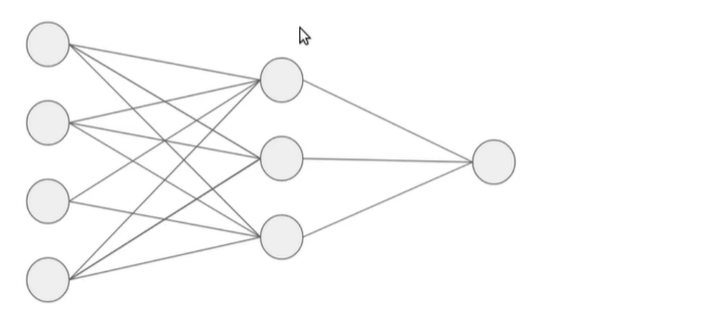

In [32]:
# import different layers from keras
from keras.layers import InputLayer, Dense

### To define number of input neurons we need to know the number of features in data set

In [33]:
# number of input neurons
X_train.shape

(491, 11)

In [34]:
# number of features in the data - index 1
X_train.shape[1]

11

summary: There will be 11 input neurons for the network.

In [35]:
# defining input neurons
input_neurons = X_train.shape[1]

In [36]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have a single neuron in the output layer

In [37]:
# define number of output neurons
output_neurons = 1

In [38]:
# number of hidden layers and hidden neurons
# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [39]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

summary: number of hidden layers and number of neurons in hidden layers are the neural network hyperparameters

In [40]:
# activation function of different layers

# for now we picked relu as an activation function for hidden layers, this can be changed as well
# since this is a binary classification problem, we will use sigmoid activation in the final layer

In [41]:
# defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [42]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [44]:
# number of parameters between input and first hidden layer
# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

summary: explains why there are 120 parameters in first hidden layer

In [45]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

summary: 55 parameters in second layer

In [46]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

summary: output layer has 6 parameters

# 4. Compiling the model (defining loss function, optimizer)

In [47]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# evaluation metric as accuracy

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 5. Training the model

In [48]:
# training model

# passing independent and dependent features for training set for training the model

# validation data will be evaluated at end of each epoch

# setting the epochs at 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50) #epoch nums is number of times a complete propogation occurs

Epoch 1/50
16/16 [==============================] - 4s 27ms/step - loss: 0.6896 - accuracy: 0.5886 - val_loss: 0.6756 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6656 - accuracy: 0.6701 - val_loss: 0.6539 - val_accuracy: 0.6829
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6469 - accuracy: 0.6884 - val_loss: 0.6362 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6330 - accuracy: 0.6864 - val_loss: 0.6232 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6219 - accuracy: 0.6864 - val_loss: 0.6152 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6147 - accuracy: 0.6864 - val_loss: 0.6095 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.6864 - val_loss: 0.6056 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

# 6. Evaluating model performance on validation set

In [49]:
# getting prediction for the validation set
prediction = np.where(model.predict(X_test) < 0.5, 0, 1)

4/4 [==============================] - 0s 6ms/step


In [51]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

# 6. Visualizing model performance

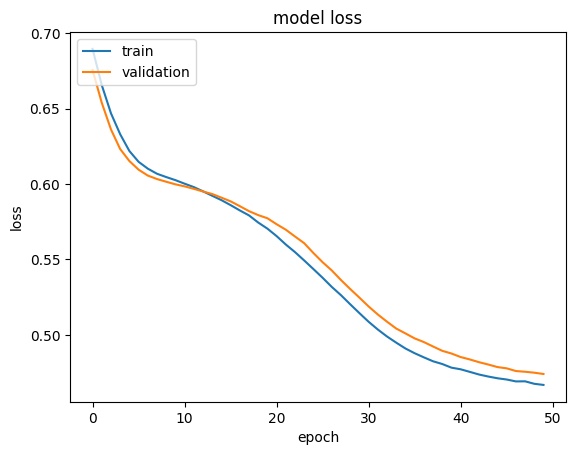

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

summary: Loss decreased for every epoch and we achieved our goal of minimizing loss with our output, thus we can say the neural network performed very well on the data and our predictions should be accurate.

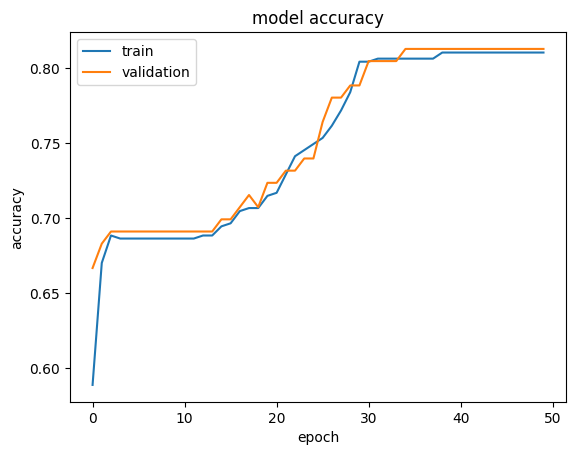

In [53]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

summary: accuracy improved after epoch 20 to 0.80, but did not improve much after epoch 35 and leveled off so training for 50 epochs may not have been necessary. However, an accuracy score of 0.80 is excellent so we can validate that the predictions are accurate.